<a href="https://colab.research.google.com/github/SergiiRv/first/blob/master/Lesson_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=100, n_informative=10)

In [34]:
X.shape, y.shape, y[:,None].shape

((1000, 100), (1000,), (1000, 1))

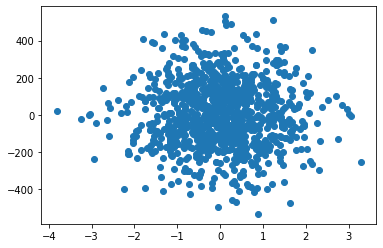

In [5]:
plt.scatter(X[:,0],y)

In [6]:
from numpy import linalg

xt = X.T
#xt = X.transpose()
B = linalg.inv((xt@X)).dot(xt)@y

In [7]:
print(B)

[-6.10622664e-15  3.10862447e-15  7.54951657e-15 -3.10862447e-15
 -3.55271368e-15 -3.55271368e-15 -4.44089210e-16 -4.44089210e-15
 -6.66133815e-16 -3.99680289e-15 -3.55271368e-15 -5.77315973e-15
 -7.42461648e-15 -8.88178420e-16  1.24344979e-14  1.24344979e-14
  2.66453526e-15 -7.10542736e-15  9.05335608e+01  6.66133815e-15
  7.99360578e-15 -5.32907052e-15 -1.50990331e-14 -9.76996262e-15
 -1.77635684e-15 -8.43769499e-15 -4.44089210e-16 -3.99680289e-15
  5.58666603e+01 -3.83720833e-15  4.21884749e-15  3.99680289e-15
  4.44089210e-16  3.33066907e-15  1.77635684e-15 -8.43769499e-15
  3.50243470e+01 -6.21724894e-15  6.59817109e+01 -2.10942375e-15
  5.77315973e-15 -1.55431223e-15  5.32907052e-15 -5.10702591e-15
  1.19904087e-14  1.77635684e-15  3.55271368e-15 -9.32587341e-15
  6.07957007e+01  2.22044605e-15 -1.44328993e-15  5.77315973e-15
  1.88737914e-15  5.72498277e+01  1.37899957e+01 -2.33146835e-15
 -1.33226763e-15  8.88178420e-16 -4.99600361e-15 -2.44249065e-15
  9.76996262e-15 -6.21724

In [8]:
y_pred = X @ B
mse_loss = np.sum((y - y_pred) ** 2)

In [9]:
print(mse_loss)

9.304939584990012e-24


In [10]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y)

In [35]:
N = 10
b1 = np.random.rand(100, N)
b2 = np.random.rand(N, 1)
lr = 0.0001

In [36]:
b1.shape, b2.shape, X_train.shape

((100, 10), (10, 1), (750, 100))

In [37]:
for i in range(100):
    y1 = X @ b1
    z1 = np.tanh(y1)
    y2 = z1 @ b2
    print(b2.shape, y2.shape)
    db2 = z1.T @ (2*(y2 - y[:, None]))
    b2 = b2 - (lr * db2)
    print(db2.shape, b2.shape)

    db1_1 = 2*(y2 - y)
    db1_2 = b2
    db1_3 = 1-z1**2
    db1_4 = X
    db1 = np.linalg.multi_dot([db1_1, db1_2, db1_3, db1_4])
    b1 = b1 - (lr * db1)

    mse_loss = np.sum((y2 - y) ** 2)
    print(f'MSE after {i+1} step: {mse_loss}')

(10, 1) (1000, 1)
(10, 1) (10, 1)


ValueError: ignored

In [16]:
a=1 - np.sinh(X @ b1)**2
X.shape, b1.shape, a.shape

((1000, 100), (100, 10), (1000, 10))

In [21]:
y1.shape, z1.shape, y2.shape, db2.shape, b2.shape

((1000, 10), (1000, 10), (1000, 1000), (10, 1000), (10, 1000))